In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp  
import seaborn as sns

In [4]:
sns.set()

# 1D 
### From scratch

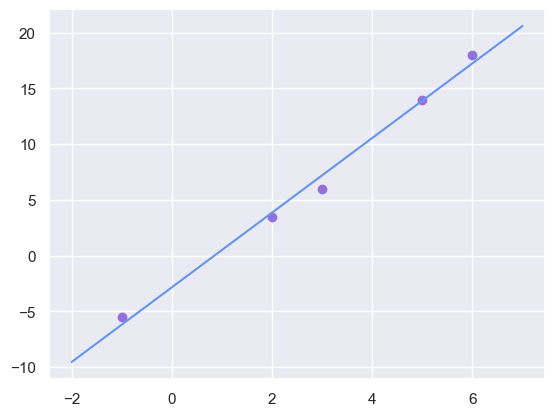

In [5]:

w0, w1, x, y = sp.symbols('w0 w1 x y')  

data = [(-1, -5.5), (2, 3.5), (3, 6), (5, 14), (6, 18)]  # (x_i, y_i)  

SSE = sum((y_i - (w0 + w1 * x_i))**2 for x_i, y_i in data)  

derivative_w0 = sp.diff(SSE, w0)  
derivative_w1 = sp.diff(SSE, w1)  

# برابر قرار دادن مشتقات با صفر  
equation_w0 = sp.Eq(derivative_w0, 0)  
equation_w1 = sp.Eq(derivative_w1, 0)  

solutions = sp.solve((equation_w0, equation_w1), (w0, w1))  
w0, w1 = float(solutions[w0]), float(solutions[w1])
xi = [i[0] for i in data]
yi = [i[1] for i in data]
plt.scatter(xi, yi, color="mediumpurple")


x_reg = np.linspace(-2,7)
y_reg = (lambda x:w1*x+w0)(x_reg)
plt.plot(x_reg, y_reg, color="cornflowerblue")


# 1D
### numpy, scipy, sklearn

- ### numpy
    ```python
    np.poly1d( np.polyfit(x,y,deg) )
    ```
- ### scipy
    ```python
    scipy.stats.linregress(x, y)
    ```
- ### sklearn
    ```python
    sklearn.linear_model.LinearRegression
    ```

    ```python
    .fit(X, y)
    ```
    ```python
    .predict(X)
    ```
    ```python
    .score(X, y)
    ```

Slope: 2.4873870042804067
Intercept: 0.4443021548944639
R-squared: 0.9283379967654034
P-value: 6.763784060355968e-58
Standard Error: 0.06981065808828159


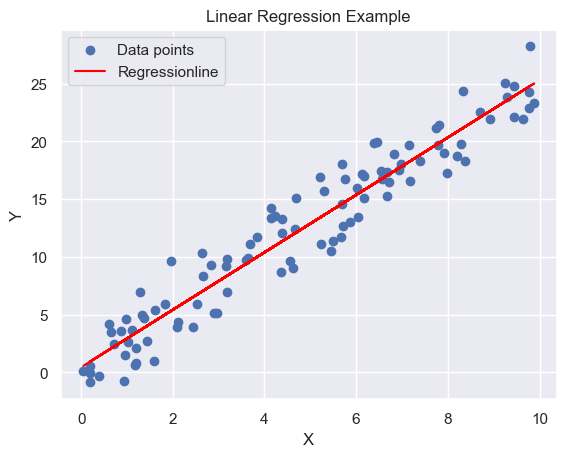

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate sample data
np.random.seed(0)  # Set seed for reproducibility
x = np.random.rand(100) * 10  # 100 random points between 0 and 10

y = 2.5 * x + np.random.randn(100) * 2  # y = 2.5 * x + random noise

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Display results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")  # Coefficient of determination
print(f"P-value: {p_value}")  # P-value for the hypothesis test
print(f"Standard Error: {std_err}")  # Standard error of the slope

# Plot data points and the regression line
plt.scatter(x, y, label='Data points')
plt.plot(x, slope * x + intercept, color='red',
	 label='Regressionline')  # Regression line
plt.xlabel('X')  # X-axis label
plt.ylabel('Y')  # Y-axis label
plt.title('Linear Regression Example')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot

# Multiple feature 
### From scratch

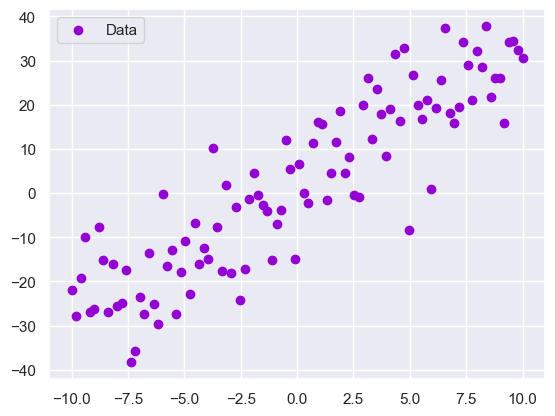

In [30]:
def generate_data(n=50, noise=10):
    np.random.seed(42)
    X = np.linspace(-10,10,n)
    true_slope = 3
    true_intercept = 3
    noise = np.random.randn(n) * noise
    Y = true_slope*X + true_intercept + noise
    return X,Y


X, Y = generate_data(100, 10)

plt.scatter(X, Y, color="darkviolet", label="Data")
plt.legend()
plt.show()



Weights: [1.96153483 3.06896634]


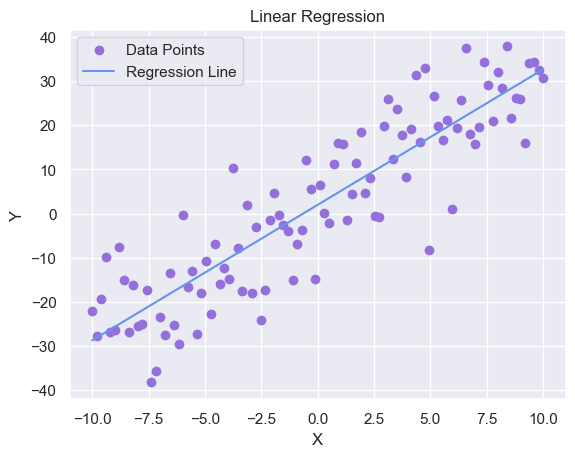

In [32]:

X_b = np.c_[np.ones((X.shape[0], 1)), X]  # اضافه کردن یک ستون از 1ها

# محاسبه وزن‌ها با استفاده از فرمول حداقل مربعات
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

# نمایش وزن‌ها
print("Weights:", w)

# پیش‌بینی مقادیر با استفاده از وزن‌های بهینه
Y_pred = X_b.dot(w)

# ترسیم داده‌ها و خط رگرسیون
plt.scatter(X, Y, color='mediumpurple', label='Data Points')
plt.plot(X, Y_pred, color='cornflowerblue', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [46]:
def J(w):
    return w[0]**2 + 2*w[1]**2

def grad_j(w):
    return np.array( [2*w[0], 4*w[1]] )



In [47]:
def gradient_descent(grad, w_init, learning_rate=0.1, n_steps=20):
    w = np.array(w_init)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        w = w-learning_rate*grad_w
        path.append(w.copy())
    
    return np.array(path)



Text(0.5, 1.0, 'Gradient Descent on convex function')

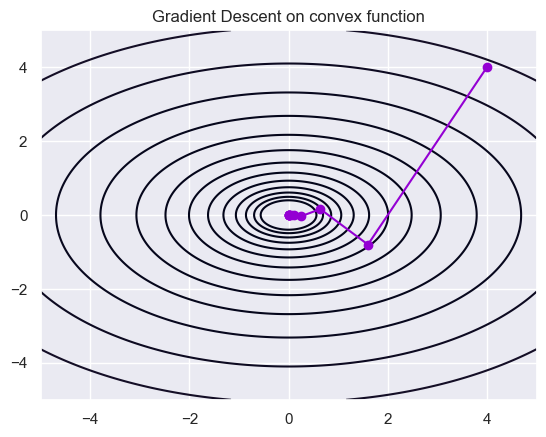

In [66]:
w_init = [4,4]
path_convex = gradient_descent(grad_j, w_init, learning_rate=0.3, n_steps=10)

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1,W2 = np.meshgrid(w1_vals, w2_vals)
J_vals = J([W1, W2])

contour_level = np.logspace(-0.5, 3, 20)
plt.contour(W1,W2, J_vals, levels=contour_level)
path_x, path_y = path_convex[:,0], path_convex[:, 1]
plt.plot(path_x, path_y, marker="o", color="darkviolet", label="Gradient Descent Path")
plt.title("Gradient Descent on convex function")
